In [23]:
using Plots, LinearAlgebra, LaTeXStrings

default(xtickfontsize=12,ytickfontsize=12,xguidefontsize=12,yguidefontsize=12,legendfontsize=12)

### Typical tight binding model $t_L=t_R$

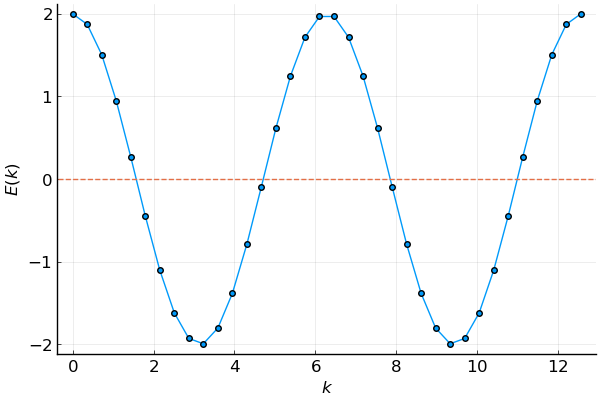

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [10]:
pythonplot()
a=1
t=1
k = LinRange(0,4*pi, 36)
E = @. (2*t*cos(k*a))
plot(k,E, label="", marker=:circle, xlabel=L"k", ylabel=L"E(k)")
hline!([0], linestyle=:dash, label="")

In [11]:
savefig("../PAPERS/FIGS_MANUS_NHSE/HN_herm.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/HN_herm.pdf"

### Real vs. Imaginary part of $E(k)$ for PBC

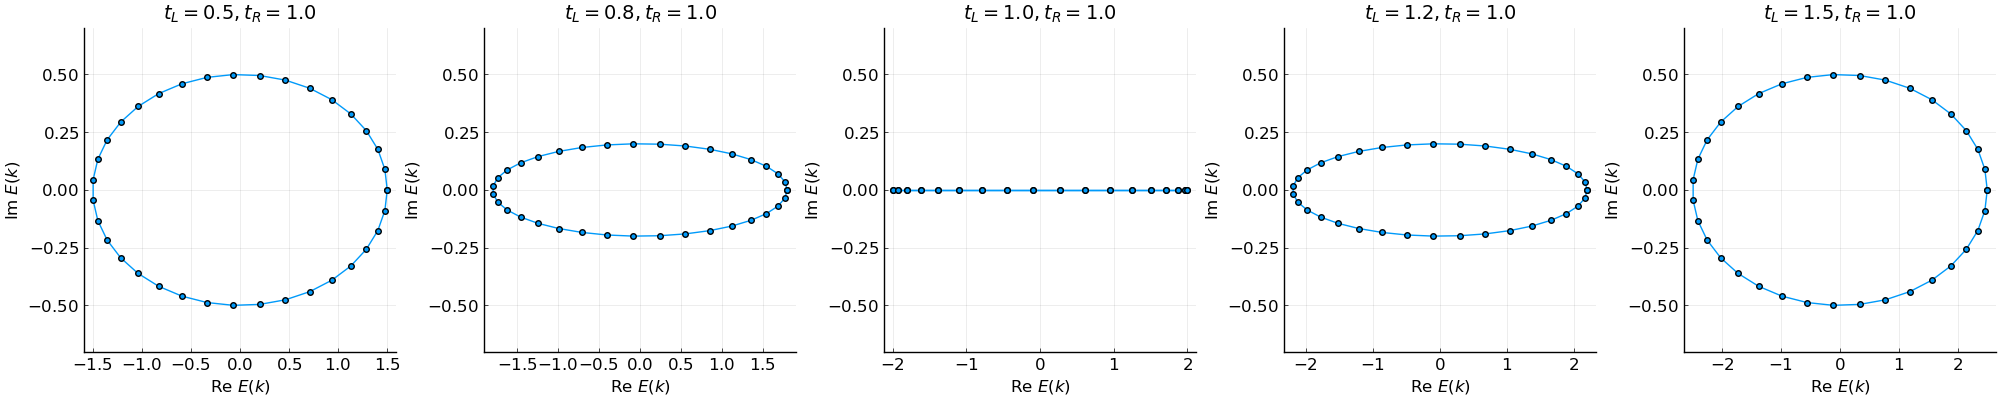

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [32]:
tl = [0.5,0.8,1.0,1.2,1.5]
tri = 1.0
k = LinRange(0,2*pi, 36)
p=[]
for tle in tl
Ere = @. (tle +tri)*cos(k) 
Eim = @. (tle -tri)*sin(k) 
p1 = plot(Ere, Eim, marker=:circle, xlabel=L"\mathrm{Re}\ E(k)", ylabel=L"\mathrm{Im}\ E(k)", label="", ylim=(-0.7,0.7), title=L"t_L=%$tle, t_R= %$tri")
push!(p,p1)
end
plot!(p..., layout=(1,5), size=(2000,400))

In [33]:
savefig("../PAPERS/FIGS_MANUS_NHSE/HN_Ek.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/HN_Ek.pdf"

### Defining Hatono-Nelson Hamiltonian Matrix

In [17]:
function HN_ham(N::Int64, jl::Float64,jr::Float64, str)
    tup = jl*ones(N-1)
    tdown = jr*ones(N-1)
    H = Tridiagonal(tdown, zeros(N), tup)
    H = Matrix(H)
    if(str=="pbc") 
        H[1,end] = jr
        H[end,1] = jl
    end
    return H
end

HN_ham (generic function with 1 method)

### Checking the skin effect (boundary localisation in OBC)

In [18]:
N=100
tle = 1.5
tre = 0.5
H1 = HN_ham(N, tle, tre, "obc")
E1,V1 = eigen(H1);
tle = 0.5
tre = 1.5
H2 = HN_ham(N, tle, tre,"obc")
E2,V2 = eigen(H2);

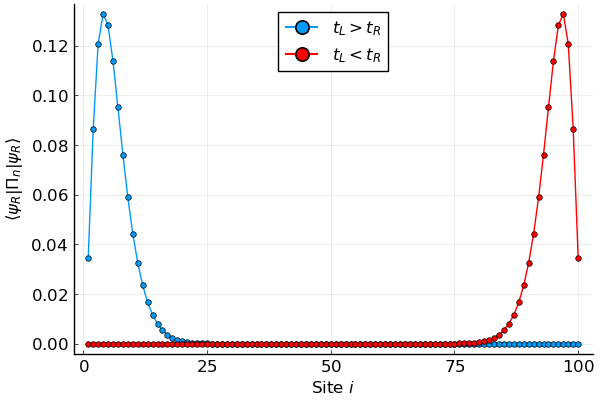

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [34]:
plot()
plot!(abs2.(V1[:,2]), marker=:circle, label=L"t_L>t_R", msw=0.5)
plot!(abs2.(V2[:,2]), marker=:circle, label=L"t_L<t_R", legend=:top, msw=0.5, c="red")
plot!(ylabel=L"\langle \psi_R |\Pi_n | \psi_R \rangle")
plot!(xlabel=L"Site $i$")

In [35]:
savefig("../PAPERS/FIGS_MANUS_NHSE/HN_skin.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/HN_skin.pdf"

### Real vs. Imaginary E for OBC, PBC case 

In [36]:
H = HN_ham(50,0.6,1.0,"pbc");
H1 = HN_ham(50,0.6,1.0,"obc");

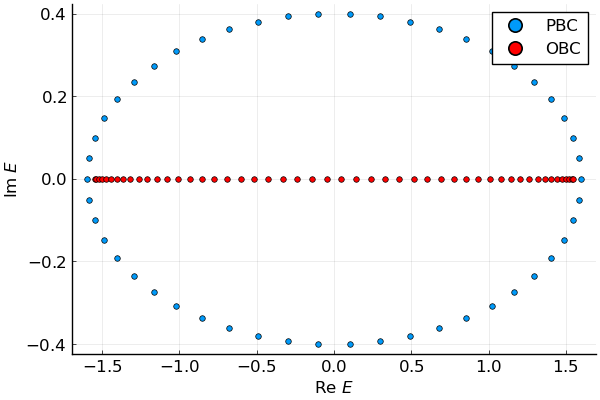

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [37]:
E = eigvals(H)
E1 = eigvals(H1);
scatter(real.(E), imag.(E), label="PBC", marker=:circle, msw=0.5)
scatter!(real.(E1), imag.(E1), label="OBC", marker=:circle, xlabel=L"\mathrm{Re}\ E",ylabel=L"\mathrm{Im}\ E", msw=0.5, c="red")

In [38]:
savefig("../PAPERS/FIGS_MANUS_NHSE/E_pbc_obc.pdf")

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


"/home/shaggy1304/IISER/NHTI NIUS/NonHermPhysics/PAPERS/FIGS_MANUS_NHSE/E_pbc_obc.pdf"